# Proyecto Showz

## Introduccion
Para el desarrollo de este proyecto, buscamos optimizar los gastos de marketing basando la investigación en el análisis de datos de comportamiento de los usuarios. A su vez, se establecerán cohortes de clientes con el objetivo de entender cómo, cuándo y cuánto aportan a la compañía. Este enfoque nos permitirá identificar patrones de uso, momentos clave en el ciclo de vida del cliente y calcular el retorno de la inversión en adquisición, facilitando así una mejor toma de decisiones estratégicas.

Contamos con los registros del servidor con los siguientes datasets:
- visits.csv: visitas al sitio (ID, fuente, timestamp, etc.).

- orders.csv: pedidos (cliente, fecha, importe, etc.).

- costs.csv: gastos de marketing (fecha, canal, inversión).

# Objetivo General
``Optimizar los gastos de marketing entendiendo cómo, cuándo y cuánto aportan los clientes.``

## Descripcion de los datos
La tabla `visits` (registros del servidor con datos sobre las visitas al sitio web):

- Uid: identificador único del usuario.
- Device: dispositivo del usuario.
- Start Ts: fecha y hora de inicio de la sesión.
- End Ts: fecha y hora de término de la sesión.
- Source Id: identificador de la fuente de anuncios de la que proviene el usuario.

Todas las fechas de esta tabla están en formato AAAA-MM-DD.

La tabla `orders` (datos sobre pedidos):

- Uid: identificador único del usuario que realiza un pedido.
- Buy Ts: fecha y hora del pedido. Revenue: el ingreso de Showz por el pedido.

La tabla `costs` (datos sobre gastos de marketing):

- source_id: identificador de la fuente de anuncios.
- dt: fecha.
- costs: gastos en esta fuente de anuncios en este día.

In [ ]:
# Cargar todas las librerias
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Designar las variables de los Dataframe 
visits= pd.read_csv('/Users/ASUS/OneDrive/Documentos/Tripleten/Proyecto Spring 9/visits_log_us.csv', sep=',') 
orders=pd.read_csv('/Users/ASUS/OneDrive/Documentos/Tripleten/Proyecto Spring 9/orders_log_us.csv', sep=',')
costs=pd.read_csv('/Users/ASUS/OneDrive/Documentos/Tripleten/Proyecto Spring 9/costs_us.csv', sep=',')

## Nombres asignados a los DataFrames

Para garantizar un desarrollo estructurado y eficiente del proyecto, se asignaron nombres descriptivos a los *DataFrames* generados a partir de las consultas a los servidores. Esta práctica permite mantener un flujo de trabajo organizado y facilita la interpretación de los resultados en las distintas etapas del análisis. Las asignaciones realizadas son las siguientes:

- `visits`: corresponde al resultado de la consulta `visits_log_us`.
- `orders`: corresponde al resultado de la consulta `orders_log_us`.
- `costs`: corresponde al resultado de la consulta `costs_us`.

A continuación, el análisis exploratorio de los datos.


In [ ]:
# Visualizacion preliminar de los dataframes:

visits.info()

# estandarizar datos:
for col in visits.select_dtypes(include='object'):
    visits[col] = visits[col].str.lower()

print('\n', visits.sample(n=5))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB

          Device               End Ts  Source Id             Start Ts  \
147410  desktop  2017-10-27 20:52:00          1  2017-10-27 20:31:00   
125818  desktop  2017-11-26 23:29:00          1  2017-11-26 23:28:00   
117223  desktop  2017-12-16 14:19:00          3  2017-12-16 13:56:00   
341070  desktop  2017-07-11 11:59:00          2  2017-07-11 11:11:00   
287602    touch  2017-12-21 16:32:00          3  2017-12-21 16:31:00   

                         Uid  
147410  16639318809280003412  
125818   8698354640513568549  
117223   76773070751

In [1855]:
# Visualizacion preliminar de los dataframes:

orders.info()

print('\n', orders.sample(n=5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB

                     Buy Ts  Revenue                   Uid
142    2017-06-02 13:04:00     2.44  17008161102345737967
14426  2017-10-24 22:44:00     3.54   2783330331264448762
5068   2017-08-08 22:48:00     9.78  15875646386592721870
38759  2018-03-07 15:14:00     0.79   8668273609061481289
48885  2018-05-25 11:17:00     5.50   9564065835659864659


In [ ]:
# Visualizacion preliminar de los dataframes:

costs.info()

print('\n', costs.sample(n=5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB

       source_id          dt   costs
1593          5  2017-10-20  189.67
163           1  2017-11-11   77.93
551           2  2017-12-06  160.62
150           1  2017-10-29   78.69
1436          4  2018-05-16  199.99


## Correcion de tipo de datos

Dado que la naturaleza de los datos requiere un procesamiento adecuado, es fundamental contar con una estructura organizada y coherente. Por esta razón, se ha llevado a cabo una reorganización estratégica de los conjuntos de datos, lo cual permitirá facilitar su análisis en cada etapa del proyecto. A continuación, se detallan las transformaciones realizadas específicamente en los dataframes visits, orders y costs:

- En ``visits``, se renombran las columnas para eliminar espacios y facilitar el manejo del código (Start Ts a start_ts, End Ts a end_ts, etc.), y se convierten las columnas de fechas al formato datetime.

- En ``orders``, se transforma la columna Buy Ts a buy_ts y se asegura que los ingresos (revenue) estén en el tipo numérico correcto.

- En ``costs``, se homogeneizan los nombres (dt para la fecha, costs para los gastos) y se convierte la columna de fechas a datetime.

Esta preparación garantiza que los datos estén listos para los análisis de comportamiento, cohortes y rentabilidad que se desarrollarán a lo largo del proyecto.

In [ ]:
# Renombrar columnas para que sean más fáciles de manejar

visits.columns = ['device','end_ts', 'source_id','start_ts','uid']
orders.columns = ['buy_ts', 'revenue','uid']
costs.columns = ['source_id', 'dt', 'costs']

## Convertir fechas a datetime



visits['start_ts']=pd.to_datetime(visits['start_ts'])
visits['end_ts']=pd.to_datetime(visits['end_ts'])

orders['buy_ts']=pd.to_datetime(orders['buy_ts'])

costs['dt']=pd.to_datetime(costs['dt'])

# Revisar los tipos
print(visits.dtypes)
print(orders.dtypes)
print(costs.dtypes)



device               object
end_ts       datetime64[ns]
source_id             int64
start_ts     datetime64[ns]
uid                  uint64
dtype: object
buy_ts     datetime64[ns]
revenue           float64
uid                uint64
dtype: object
source_id             int64
dt           datetime64[ns]
costs               float64
dtype: object


# Visitas

## ¿Cuántas personas lo usan cada día, semana y mes?

- Se tiene que implementar una clasificación de las fechas para establecer la cantidad de personas y calcular un promedio mensual, semanal y diario con fines de análisis.

In [1858]:
# Crear columnas de dia, semana y mes

visits['date']=visits['start_ts'].dt.date
visits['week']=visits['start_ts'].dt.isocalendar().week 
visits['month']=visits['start_ts'].values.astype('datetime64[M]')
visits['year']=visits['start_ts'].dt.isocalendar().year
print(visits.sample(n=5))

         device              end_ts  source_id            start_ts  \
324566  desktop 2018-03-15 11:18:00          2 2018-03-15 11:16:00   
325693  desktop 2017-09-21 22:41:00          5 2017-09-21 22:41:00   
110836  desktop 2017-08-10 16:18:00          1 2017-08-10 16:05:00   
117526  desktop 2017-11-11 02:13:00          1 2017-11-11 01:51:00   
24481     touch 2017-09-30 15:28:00          4 2017-09-30 15:07:00   

                         uid        date  week      month  year  
324566  15659017033845765701  2018-03-15    11 2018-03-01  2018  
325693   5289240999361742799  2017-09-21    38 2017-09-01  2017  
110836   1270783073996707124  2017-08-10    32 2017-08-01  2017  
117526   4394506233053867282  2017-11-11    45 2017-11-01  2017  
24481   10935833954707210491  2017-09-30    39 2017-09-01  2017  


In [1859]:
# Usuarios únicos por día
daily_users = visits.groupby('date')['uid'].nunique().mean()

print(f"En promedio {round(daily_users)} usuarios visitaron la plataforma a nivel diario.")

# Usuarios únicos por semana
wau_total =visits.groupby(['year', 'week'])['uid'].nunique().mean()



print(f"En promedio {round(wau_total)} usuarios visitaron la plataforma a nivel semanal.")

# Usuarios únicos por mes
mau_total = visits.groupby(['year','month'])['uid'].nunique().mean()


print(f"En promedio {round(mau_total)} usuarios visitaron la plataforma a nivel anual.")

En promedio 908 usuarios visitaron la plataforma a nivel diario.
En promedio 5716 usuarios visitaron la plataforma a nivel semanal.
En promedio 23228 usuarios visitaron la plataforma a nivel anual.


- En el análisis del comportamiento de los usuarios, se observa que la plataforma recibió, en promedio, ``908 usuarios únicos`` por día. A nivel semanal, esta cifra se incrementa a ``5,716 usuarios únicos``, lo que indica una recurrencia moderada en el uso del servicio. Finalmente, al analizar el tráfico anual, se identificó un promedio de ``23,228 usuarios únicos``, lo que permite dimensionar el alcance general de la plataforma a lo largo del año.

## ¿Cuántas sesiones hay por día?

In [ ]:
# Cantidad de sesiones por día
daily_sessions = visits.groupby('date')['uid'].count().mean()

print(f"En promedio hubo {round(daily_sessions)} sesiones por dia.")


En promedio hubo 987 sesiones por dia.


- En promedio, se registraron aproximadamente ``987 sesiones diarias en la plataforma``, lo que refleja una actividad constante de los usuarios a lo largo del periodo analizado.

## ¿Cuál es la duración de cada sesión?

         device              end_ts  source_id            start_ts  \
61081   desktop 2018-01-11 18:40:00          9 2018-01-11 18:38:00   
305767  desktop 2017-07-08 11:37:00          5 2017-07-08 11:33:00   
350067    touch 2017-09-05 01:59:00          5 2017-09-05 01:49:00   
326279  desktop 2018-04-29 17:44:00          5 2018-04-29 17:44:00   
62717   desktop 2017-11-10 21:47:00          4 2017-11-10 21:32:00   
358038  desktop 2018-03-29 13:36:00          4 2018-03-29 13:33:00   
146180  desktop 2017-10-09 15:57:00          2 2017-10-09 15:53:00   
202158  desktop 2018-05-26 16:03:00          3 2018-05-26 15:27:00   
221598  desktop 2017-12-22 08:57:00          4 2017-12-22 08:46:00   
154697  desktop 2017-06-03 16:24:00          4 2017-06-03 16:12:00   

                         uid        date  week      month  year  \
61081   17640172177553711790  2018-01-11     2 2018-01-01  2018   
305767  11112791584663609936  2017-07-08    27 2017-07-01  2017   
350067   1368395119342757024

<Axes: >

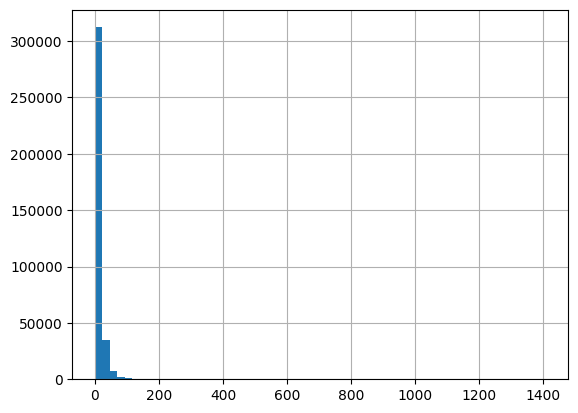

In [ ]:
# Duracion promedio de cada sesión en minutos 

visits['session_duration'] = (visits['end_ts'] - visits['start_ts']).dt.seconds/60
print(visits.sample(n=10))
visits['session_duration'].hist(bins=60)



- Teniendo en cuenta que la distribucion no representan un comportamiento normal se hace necesario recurrir a la 'moda' de los datos para saber con certeza la duracion de cada usuario real.

In [1862]:
# Media y moda de los datos
 
avg_per_day = visits['session_duration'].mean()
asl_per_day = visits['session_duration'].mode()

print(f"\nLa duracion promedio de cada sesion es de {round(avg_per_day)} minutos")
print(f"\nLa duracion en minutos de cada sesion teniendo en cuenta la moda de los datos oscila entre:\n {round(asl_per_day)}")


La duracion promedio de cada sesion es de 11 minutos

La duracion en minutos de cada sesion teniendo en cuenta la moda de los datos oscila entre:
 0    1.0
Name: session_duration, dtype: float64


- La duración promedio de cada sesión en la plataforma es de aproximadamente 11 minutos, lo que sugiere que los usuarios dedican un tiempo moderado a navegar o interactuar con el sitio durante cada visita.

Por otro lado, al observar la moda de la duración de las sesiones —es decir, la duración más frecuente entre todas las registradas— se encuentra que la mayoría de las sesiones tienden a durar alrededor de 1 minuto. Esto indica que, aunque en promedio los usuarios permanecen 11 minutos, una gran proporción de sesiones son muy breves, lo que podría deberse a visitas rápidas o usuarios que abandonan el sitio sin interactuar mucho.

Este contraste entre la media y la moda resalta la importancia de considerar la distribución completa de las duraciones y no solo los valores promedio al evaluar el compromiso de los usuarios.

## ¿Con qué frecuencia los usuarios regresan?

- Para el análisis de la frecuencia de usuarios que regresan, se considerará cuidadosamente el factor "sticky", una métrica comúnmente empleada para evaluar el compromiso del usuario. Específicamente, se calcularán los indicadores sticky semanal y mensual, los cuales serán fundamentales para el análisis del comportamiento y la retención de los usuarios en la plataforma 

In [1863]:
# Factor semanal y mensual 

sticky_wau=(daily_users/wau_total)*100
sticky_mau=(daily_users/mau_total)*100

print('sticky_wau',sticky_wau)
print('sticky_mau',sticky_mau)

sticky_wau 15.88440861589881
sticky_mau 3.908969652437603


- ``Sticky semanal = 15.88%``

    Esto significa que, en promedio, el 15.88% de los usuarios semanales utilizan la plataforma a diario.

    En otras palabras, de cada 100 usuarios activos en una semana, solo unos 16 usuarios usan el servicio todos los días.

- ``Sticky mensual = 3.91%``

    Esto quiere decir que solo el 3.91% de los usuarios activos en un mes están en la plataforma todos los días.

    O sea, de cada 100 usuarios mensuales, menos de 4 son realmente activos todos los días.

# Ventas

## ¿Cuándo empieza la gente a comprar?

               buy_ts  revenue                   uid      first_buy_date  \
0 2017-06-01 00:10:00    17.00  10329302124590727494 2017-06-01 00:10:00   
1 2017-06-01 00:25:00     0.55  11627257723692907447 2017-06-01 00:25:00   
2 2017-06-01 00:27:00     0.37  17903680561304213844 2017-06-01 00:27:00   
3 2017-06-01 00:29:00     0.55  16109239769442553005 2017-06-01 00:29:00   
4 2017-06-01 07:58:00     0.37  14200605875248379450 2017-06-01 07:58:00   
5 2017-06-01 08:43:00     0.18  10402394430196413321 2017-06-01 08:43:00   
6 2017-06-01 08:54:00     1.83  12464626743129688638 2017-06-01 08:54:00   
7 2017-06-01 09:22:00     1.22   3644482766749211722 2017-06-01 09:22:00   
8 2017-06-01 09:22:00     3.30  17542070709969841479 2017-06-01 09:22:00   
9 2017-06-01 09:23:00     0.37   1074355127080856382 2017-06-01 09:23:00   

  first_buy_month  first_buy_year  buy_ts_month  
0      2017-06-01            2017             6  
1      2017-06-01            2017             6  
2      2017-0

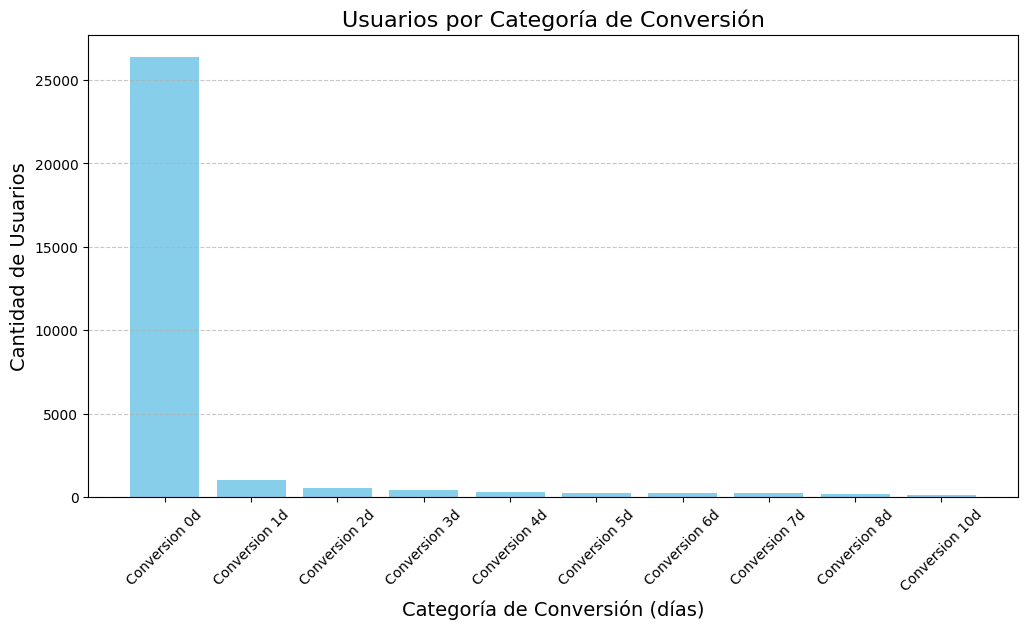

In [ ]:
# Creacion de columnas 
first_visit_date = visits.groupby('uid')['start_ts'].min()
first_order_date= orders.groupby('uid')['buy_ts'].min()

# Renombrar las columnas
first_visit_date.name ='first_visit_date'
first_order_date.name ='first_buy_date'

# Unir a los dataframes
visits = visits.join(first_visit_date, on='uid')
orders=orders.join(first_order_date, on='uid')

# Mes de la primera compra

orders['first_buy_month'] = orders['first_buy_date'].values.astype('datetime64[M]')
orders['first_buy_year'] = orders['first_buy_date'].dt.year
orders['buy_ts_month'] = orders['buy_ts'].dt.month

print(orders.head(10))

# dia de conversion 
orders_visits = pd.merge(visits, orders, on='uid')
orders_visits['conversion_days'] = (orders_visits['first_buy_date'] - orders_visits['first_visit_date']).dt.days
print(orders_visits.head(5))
orders_visits['conversion_category'] = 'Conversion ' + orders_visits['conversion_days'].astype(str) + 'd'
conversion_day= orders_visits.groupby('conversion_category')['uid'].nunique().sort_values(ascending=False)
conversion_day_top10=conversion_day.head(10)

print(conversion_day.head(10))


# Grafica de conversion 

plt.figure(figsize=(12,6))
plt.bar(conversion_day_top10.index, conversion_day_top10.values, color='skyblue')

# Títulos y etiquetas
plt.title('Usuarios por Categoría de Conversión', fontsize=16)
plt.xlabel('Categoría de Conversión (días)', fontsize=14)
plt.ylabel('Cantidad de Usuarios', fontsize=14)
plt.xticks(rotation=45)  # Rotar las etiquetas para que se lean mejor
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar gráfico
plt.show()



Alta conversión inmediata ``(Conversion 0d)``:

- La gran mayoría de los usuarios (más de 26,000) realizan su primera compra el mismo día del registro.

- Esto indica un fuerte impulso inicial o una oferta suficientemente atractiva que lleva a la conversión instantánea.

Caída pronunciada a partir del día siguiente:

- A partir de "``Conversion 1d"``, el número de conversiones disminuye drásticamente.

- Por ejemplo, para Conversion 1d hay apenas ~1,000 usuarios, y sigue cayendo de forma progresiva en los días posteriores.

Cola larga de usuarios tardíos:

- Aunque pequeñas, ``las conversiones continúan`` hasta el día 10.

- Esto sugiere que algunos usuarios necesitan más tiempo para decidirse, lo cual puede estar relacionado con ciclos de decisión más largos, dudas o menor exposición al producto/servicio.

## ¿Cuántos pedidos hacen durante un período de tiempo dado?

                  uid     revenue  buy_ts
first_buy_month                          
2017-06-01       2023  2717651.60  368863
2017-07-01       1923   515553.92   48030
2017-08-01       1370   375791.51   45378
2017-09-01       2581  1680142.63   45449
2017-10-01       4340   199474.36   30053
2017-11-01       4081   389271.90   57415
2017-12-01       4383   292560.07   44872
2018-01-01       3373   181362.28   32393
2018-02-01       3651    89378.45   22518
2018-03-01       3533   401114.22   47916
2018-04-01       2276    84302.22   11340
2018-05-01       2988    35600.77    7579
2018-06-01          1        3.42       1

 58600.53846153846


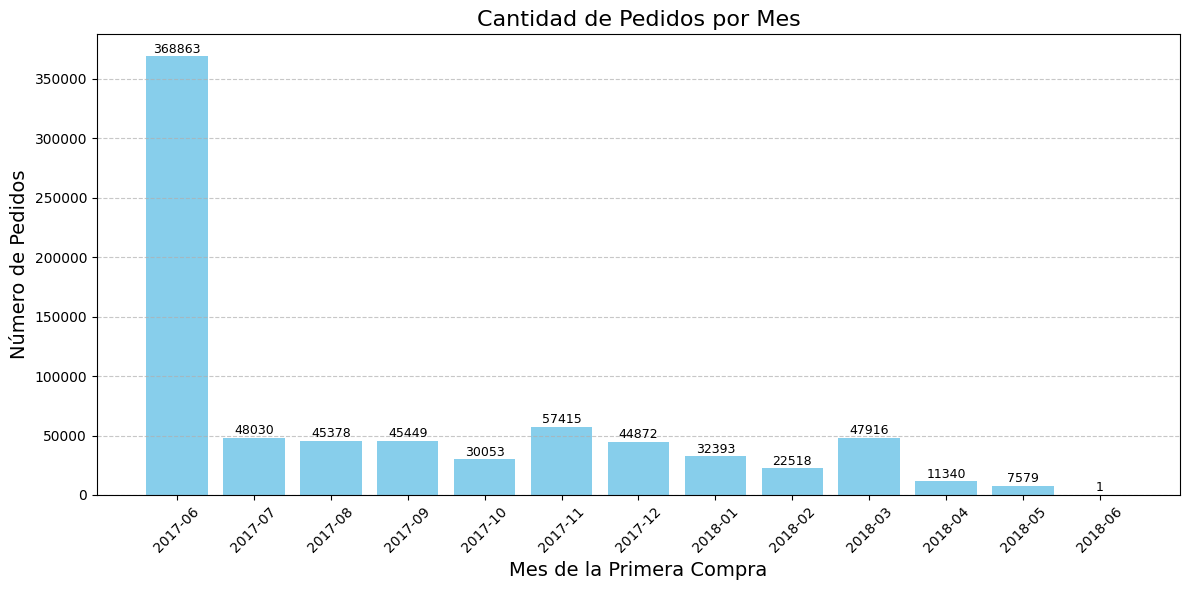

In [ ]:


cohort_grouped = orders_visits.groupby('first_buy_month').agg(
    {'uid': 'nunique', 'revenue': 'sum','buy_ts':'count'})

print(cohort_grouped)

avg_orders=cohort_grouped['buy_ts'].mean()

print( '\n', avg_orders )

# Conversión del índice a etiquetas de texto
labels = cohort_grouped.index.strftime('%Y-%m')

# Gráfico
plt.figure(figsize=(12, 6))
bars = plt.bar(labels, cohort_grouped['buy_ts'], color='skyblue')

# Títulos y etiquetas
plt.title('Cantidad de Pedidos por Mes', fontsize=16)
plt.xlabel('Mes de la Primera Compra', fontsize=14)
plt.ylabel('Número de Pedidos', fontsize=14)
plt.xticks(rotation=45)

# Mostrar los valores encima de las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 500, str(int(height)),
             ha='center', va='bottom', fontsize=9)

# Estilo
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


``Pico Anómalo en Junio 2017 (2017-06):``

- Hay un pico extremadamente alto en junio de 2017 con 368,863 pedidos, lo cual es varias veces superior al promedio del resto de los meses.

- Este valor es probablemente una anomalía o Alternativamente, podría haber sido un evento masivo o una preventa importante (como un festival grande o un artista de talla internacional).


``Meses Subsiguientes con Niveles Normales:``

- Desde julio de 2017 hasta marzo de 2018, los pedidos por mes varían entre ~22,000 y ~57,000.

- Noviembre de 2017 (2017-11) también destaca con 57,415 pedidos, lo cual puede estar relacionado con promociones de fin de año (Black Friday, etc.).

``Tendencia Descendente a Partir de 2018:``

- Esto puede deberse a una disminución del número de eventos (estacionalidad del sector).

- También puede indicar una falta de retención o adquisición de nuevos clientes.

- Otra posibilidad es una carga incompleta de datos para los meses finales.

## ¿Cuál es el tamaño promedio de compra?

El AOV (Average Order Value) o tamaño promedio de compra 

                       AOV
first_buy_month           
2017-06-01        7.367645
2017-07-01       10.733998
2017-08-01        8.281359
2017-09-01       36.967648
2017-10-01        6.637419
2017-11-01        6.779969
2017-12-01        6.519880
2018-01-01        5.598811
2018-02-01        3.969200
2018-03-01        8.371196
2018-04-01        7.434058
2018-05-01        4.697291
2018-06-01        3.420000


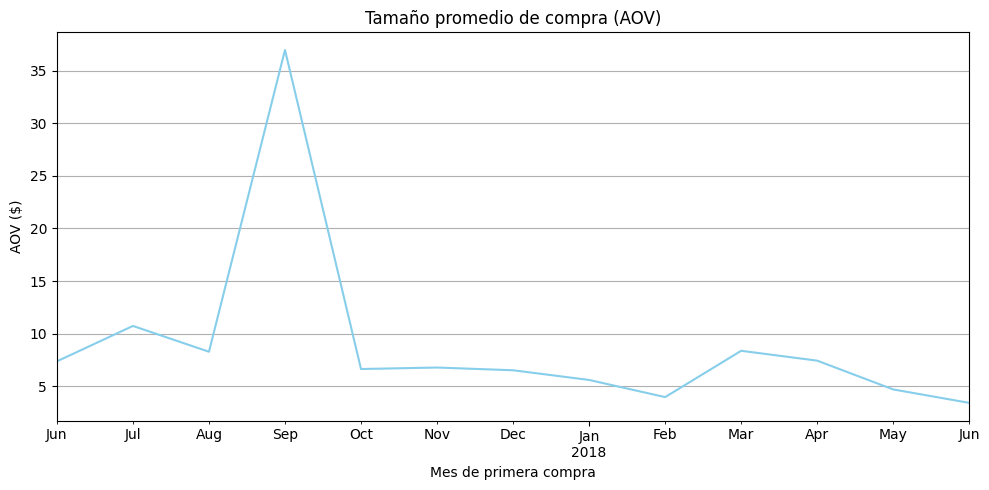

In [1866]:
cohort_grouped['AOV'] = cohort_grouped['revenue'] / cohort_grouped['buy_ts']

# Mostrar la tabla con el AOV
print(cohort_grouped[['AOV']])


# grafica
cohort_grouped['AOV'].plot(kind='line', figsize=(10, 5), color='skyblue')

plt.title('Tamaño promedio de compra (AOV)')
plt.xlabel('Mes de primera compra')
plt.ylabel('AOV ($)')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

<Axes: title={'center': 'Tamaño promedio de compra del cliente'}, xlabel='age', ylabel='first_buy_months'>

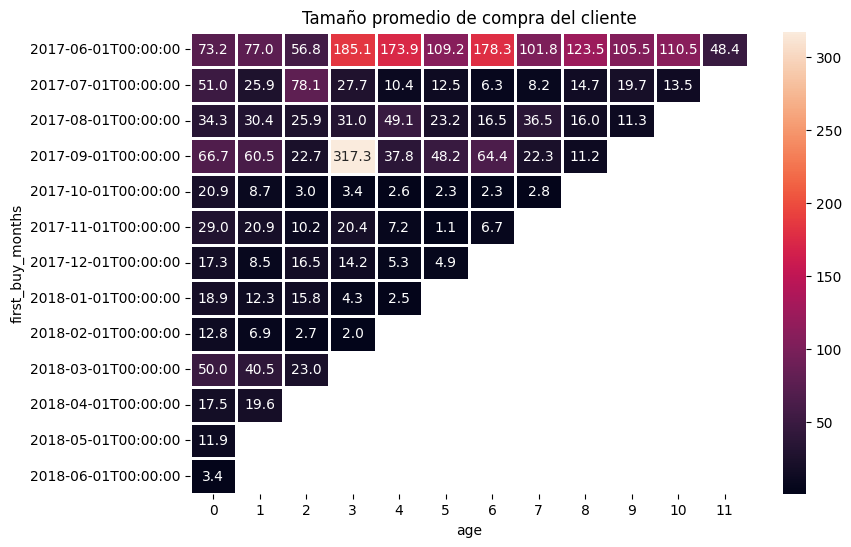

In [1867]:

# Organizamos tiempo
orders_visits['buy_ts'] = pd.to_datetime(orders_visits['buy_ts'])
orders_visits['buy_month'] = orders_visits['buy_ts'].values.astype('datetime64[M]')


first_orders = orders_visits.groupby('uid').agg({'buy_month': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_buy_months']


# El tamaño de la cohorte
cohort_sizes = (
    first_orders.groupby('first_buy_months')
    .agg({'uid': 'nunique'})
    .reset_index()
)
cohort_sizes.columns = ['first_buy_months', 'n_buyers']
cohort_sizes.head()


# Uniendo Datos
orders_ = pd.merge(orders_visits, first_orders, on='uid')
cohorts = (
    orders_.groupby(['first_buy_months', 'buy_month'])
    .agg({'revenue': 'sum'})
    .reset_index()
)
report = pd.merge(cohort_sizes, cohorts, on='first_buy_months')


# trabajando una base de calculo de 80%
margin_rate=0.8

report['gp'] = report['revenue'] * margin_rate


report['age'] = (
    (report['buy_month'] - report['first_buy_months']) / np.timedelta64(1, 'D')
) / 30.44
report['age'] = report['age'].round().astype('int')

report['revenue_per_user'] = (report['revenue']/ report['n_buyers'])

revenue_per_user_pivot = report.pivot_table(
    index='first_buy_months',
    columns='age',
    values='revenue_per_user',
    aggfunc='mean',
)

# Mapa de Calor

plt.figure(figsize=(9, 6))
plt.title('Tamaño promedio de compra del cliente')
sns.heatmap(
    revenue_per_user_pivot,
    annot=True,
    fmt='.1f',
    linewidths=1,
    
)



``Cohorte de junio 2017:``
- Dominan los valores más altos: en el mes 3 (edad 3) alcanzan un pico de 185.1, y más tarde 178.3, 173.9, etc.

- También tienen valores consistentes por muchos meses (hasta edad 11).

Esto refuerza la idea de que fue una cohorte inicial muy activa, tal vez debido a:

- lanzamiento de Showz,

- campañas promocionales fuertes,

- eventos populares,

- o carga masiva de usuarios antiguos.

Sin embargo, también podría incluir datos atípicos o poco comparables con cohortes posteriores.

``Cohortes posteriores muestran actividad decreciente:``
- A medida que los meses avanzan (julio 2017 en adelante), el tamaño promedio de compra cae drásticamente y la duración del ciclo de vida del cliente se acorta.

- Muchas cohortes (por ejemplo, noviembre y diciembre 2017) tienen actividad solo 1 o 2 meses después de la compra.

``Cohortes con picos puntuales (anomalías):``
- La cohorte de septiembre 2017 tiene un pico extraordinario en su mes 3 (edad 3) con 317.3.

- ¿Hubo un evento especial ese mes?



``Cohortes de 2018 casi inactivas:``
- A partir de enero 2018, los valores son bajos (<50 en general).

Esto podría deberse a:

menor adquisición de nuevos clientes,

menor oferta de eventos,



## ¿Cuánto dinero traen? (LTV)

<Axes: title={'center': 'LTV'}, xlabel='age', ylabel='first_buy_months'>

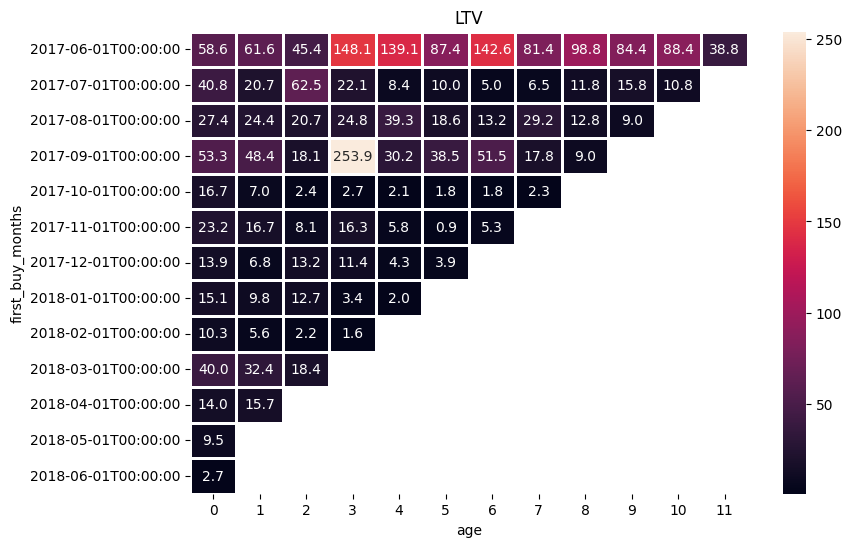

In [ ]:

report['ltv'] = report['gp'] / report['n_buyers']

output = report.pivot_table(
    index='first_buy_months', 
    columns='age', 
    values='ltv', 
    aggfunc='mean')

output.fillna('')

# Mapa de Calor

plt.figure(figsize=(9, 6))
plt.title('LTV')
sns.heatmap(
    output,
    annot=True,
    fmt='.1f',
    linewidths=1,
    
)


In [1869]:
ltv_201801 = output.loc['2018-01-01'].sum()

print(ltv_201801)

43.0150678920842


``Junio a septiembre 2017:``

- Son las cohortes más valiosas.

- La cohorte de septiembre 2017 alcanza un LTV de 253.9 en el mes 3 (máximo absoluto del gráfico).

- La cohorte de junio 2017 también destaca con un crecimiento rápido y sostenido hasta el mes 5 (LTV de 148.1) y se mantiene relativamente alto hasta el mes 10 (88.4).

- stas cohortes muestran patrones de recompra sólidos y crecimiento acumulado fuerte.

``Cohortes posteriores a octubre 2017:``

- Exhiben LTV mucho más bajos.

- En general, los clientes no generan ingresos significativos más allá de los primeros 2–3 meses.

- Esto sugiere problemas en retención o en la calidad de los clientes adquiridos tras esa fecha.

``Cohortes de 2018:``

- Muy bajo LTV desde el principio, incluso al primer mes (age = 0).

- La cohorte de marzo 2018 es una excepción parcial, con un valor inicial de 40.0, pero su crecimiento se detiene rápido.

- Indica campañas menos efectivas o pérdida de atractivo en los eventos ofrecidos.

# Marketing



Total gastado en marketing: $329131.62
source_id
3     141321.63
4      61073.60
5      51757.10
2      42806.04
1      20833.27
10      5822.49
9       5517.49
Name: costs, dtype: float64


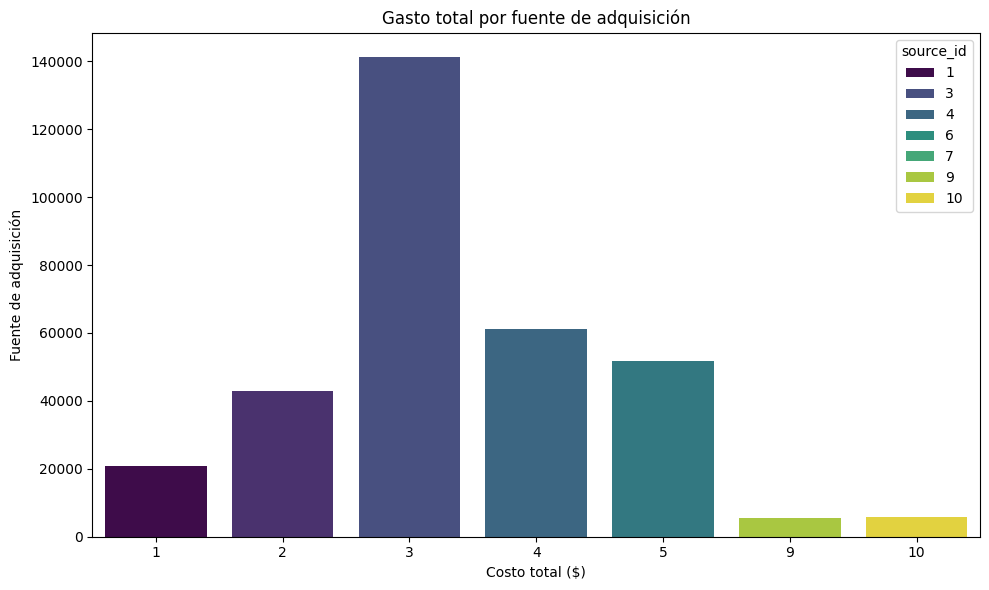

           Gasto ($) % del total
source_id                       
3          141321.63       42.9%
4           61073.60       18.6%
5           51757.10       15.7%
2           42806.04       13.0%
1           20833.27        6.3%
10           5822.49        1.8%
9            5517.49        1.7%


In [ ]:
# 1.1 Total gastado
total_costs = costs['costs'].sum()
print(f"Total gastado en marketing: ${total_costs:.2f}")

# 1.2 Gastos por fuente de adquisición
costs_by_source = costs.groupby('source_id')['costs'].sum().sort_values(ascending=False)
print(costs_by_source)

# 1.3 Gastos a lo largo del tiempo (por mes)
costs['month'] = costs['dt'].values.astype('datetime64[M]') 
monthly_costs = costs.groupby('month')['costs'].sum().reset_index()
first_orders.columns = ['month', 'costs']

# Convertir Series a DataFrame para usar Seaborn
costs_df = costs_by_source.reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=costs_df, x='source_id', y='costs',hue='source_id', palette='viridis')
plt.title('Gasto total por fuente de adquisición')
plt.xlabel('Costo total ($)')
plt.ylabel('Fuente de adquisición')
plt.tight_layout()
plt.show()



# Crear un DataFrame con el porcentaje incluido
costs_summary = pd.DataFrame({
    'Gasto ($)': costs_by_source,
    '% del total': (costs_by_source / total_costs * 100).round(1)
})

# Formatear con separadores de miles para mejor visualización
costs_summary['Gasto ($)'] = costs_summary['Gasto ($)']
costs_summary['% del total'] = costs_summary['% del total'].astype(str) + '%'

# Mostrar la tabla
print(costs_summary)




Durante el período analizado, se invirtió un total de $329,131.62 en marketing para adquirir nuevos usuarios a través diferentes fuentes (source_id). A continuación, se detalla la distribución del gasto por canal:

``Concentración del gasto:``

 - La mayor parte del presupuesto se asignó a la fuente source_id = 3, que representa casi el 43% del gasto total.

 - Las tres fuentes principales (IDs 3, 4 y 5) concentran aproximadamente el 77% del presupuesto.

`Fuentes menos utilizadas:`

 - Las fuentes con source_id = 9 y 10 recibieron menos del 2% cada una, lo que podría indicar pruebas con canales nuevos, menor rendimiento o baja capacidad de escala.

``Implicaciones estratégicas:``

 - Es fundamental evaluar si esta distribución fue eficiente comparando el LTV promedio por fuente y el CAC asociado.

 - Si source_id = 3, por ejemplo, tiene también el mayor LTV o volumen de usuarios, su alta inversión estaría justificada. Si no, se recomienda optimizar la asignación.

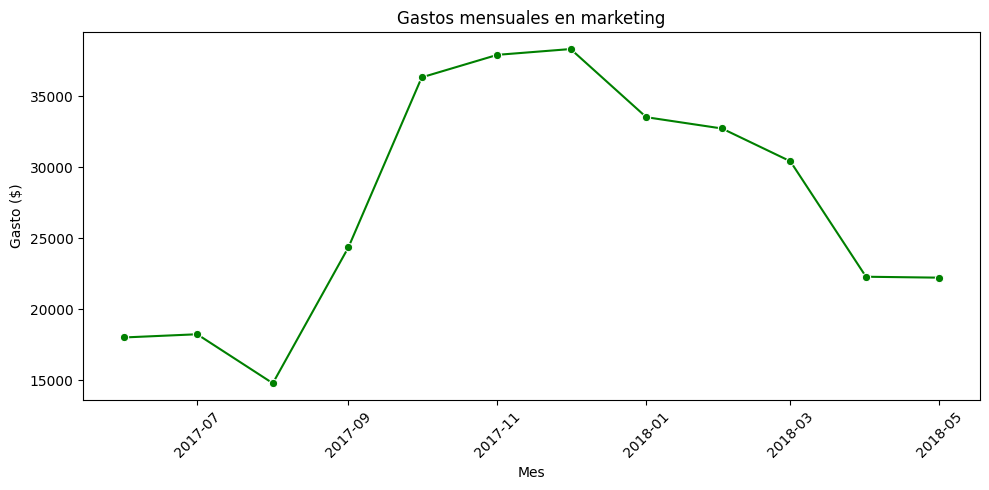

In [1871]:
# Grafico

plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_costs, x='month', y='costs', marker='o', color='green')
plt.title('Gastos mensuales en marketing')
plt.xlabel('Mes')
plt.ylabel('Gasto ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

El mayor gasto ocurre en un trimestre ``(oct-dic 2017)``, que coincide con una de las cohortes más valiosas en tu matriz ``(septiembre 2017)``.

A partir de enero 2018, se reduce el gasto mientras se espera la maduración de cohortes anteriores.

Sería útil calcular si esas cohortes devolvieron al menos el CAC en los primeros 3–6 meses.

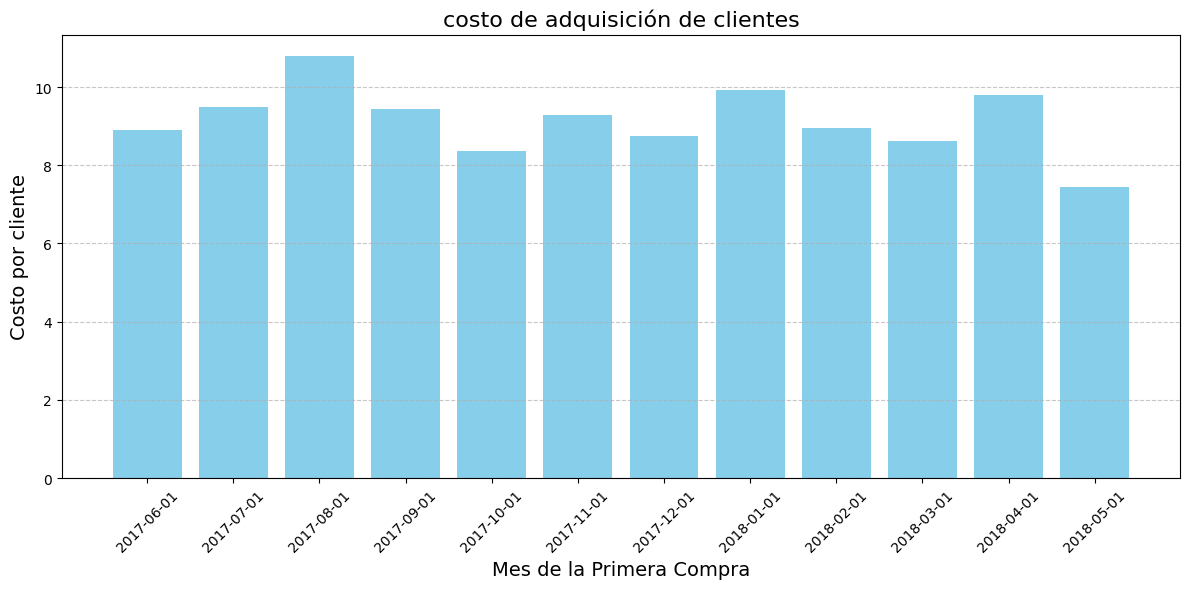

In [1872]:
# CAC

report= pd.merge(report, monthly_costs, left_on='first_buy_months', right_on='month')

report['cac'] = report['costs'] / report['n_buyers']


# Conversión del índice a etiquetas de texto
labels = report['first_buy_months'].astype('str')


# Gráfico
plt.figure(figsize=(12, 6))
bars = plt.bar(labels, report['cac'], color='skyblue')

# Títulos y etiquetas
plt.title('costo de adquisición de clientes', fontsize=16)
plt.xlabel('Mes de la Primera Compra', fontsize=14)
plt.ylabel('Costo por cliente', fontsize=14)
plt.xticks(rotation=45)



# Estilo
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()




La gráfica de barras muestra cuánto costó adquirir un cliente nuevo cada mes.

- El CAC promedio oscila entre ``7.4 y 10.8``, con picos en agosto 2017 (10.8) y enero 2018 (10.0).

- Aunque el CAC no varía bruscamente, su impacto depende directamente del LTV que genera cada cohorte. Si el CAC se mantiene alto pero el LTV cae, la inversión no se justifica.

In [1873]:
# LTC CAC para cohorte al azar: 

# obtener la cohorte necesaria
cohort_201801 = report[report['first_buy_months'] == '2018-01-01']

# calcular los costos para el mes de la cohorte
costs_201801 = costs[costs['month'] == '2018-01-01']['costs'].sum()

n_buyers_201801 = cohort_201801['n_buyers'].iloc[0]
cac_201801 = costs_201801 / n_buyers_201801
ltv_201801   = output.loc['2018-01-01'].sum()

print('CAC =', cac_201801)
print('LTV =', ltv_201801)


CAC = 9.937302104951083
LTV = 43.0150678920842


Adquirir cada cliente le costó a la empresa un promedio de $9.937, mientras que cada cliente generó $43.015 Por lo tanto, la inversión en la adquisición de clientes ``valió la pena e incluso generó beneficios``, a pesar de ver un patron decreciente las ganancias son properas en el negocio


<Axes: title={'center': 'ROMI'}, xlabel='age', ylabel='first_buy_months'>

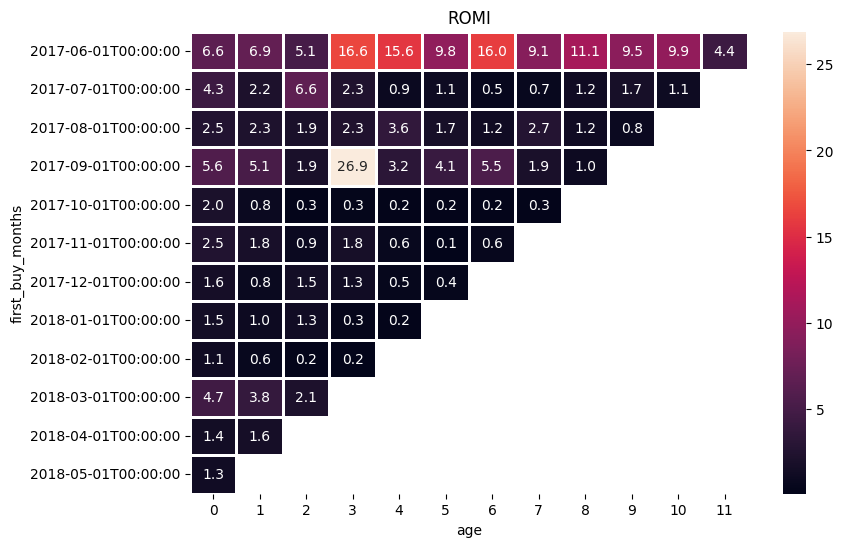

In [1874]:
# ROMI

report['romi'] = report['ltv'] / report['cac']


output = report.pivot_table(
    index='first_buy_months', 
    columns='age', 
    values='romi', 
    aggfunc='mean')

output.fillna('')

output.cumsum(axis=1).round(2)


# Mapa de Calor

plt.figure(figsize=(9, 6))
plt.title('ROMI')
sns.heatmap(
    output,
    annot=True,
    fmt='.1f',
    linewidths=1,
    
)

El ROMI se calcula como el retorno generado por cada unidad monetaria invertida en adquisición (LTV / CAC).

Las cohortes más rentables en términos de ROMI son claramente las de:

``junio 2017 (pico de 16.6–16.0 en los primeros 6 meses)``.

septiembre 2017 con un máximo ROMI de 26.9, que es excepcionalmente alto.

Desde octubre de 2017, el ROMI comienza a decaer de forma notoria, llegando a valores cercanos o incluso menores a 1 en varias cohortes (especialmente a partir de enero de 2018), lo que sugiere que el retorno no cubre ni siquiera el costo de adquisición.

In [1875]:
output.cumsum(axis=1).mean(axis=0)

age
0       2.931113
1       5.522050
2       7.958775
3      13.454684
4      17.975678
5      22.414315
6      29.135471
7      36.258972
8      47.844199
9      49.399126
10     69.471571
11    120.683946
dtype: float64

| Edad (meses) | ROMI   | Interpretación                                                                    |
| ------------ | ------ | --------------------------------------------------------------------------------- |
| 0            | 2.93   | Ya desde el primer mes, la inversión se recupera casi 3 veces. Muy buen arranque. |
| 1            | 5.52   | Sólido crecimiento. Se duplica en el segundo mes.                                 |
| 2            | 7.96   | Incremento sostenido, indicando buen engagement inicial.                          |
| 3            | 13.45  | Crecimiento agresivo: ya hay más de 13x retorno sobre inversión.                  |
| 4            | 17.98  | La campaña sigue siendo altamente rentable.                                       |
| 5            | 22.41  | Se mantiene el retorno positivo.                                                  |
| 6            | 29.14  | Ya se ha multiplicado casi 30 veces el gasto en marketing.                        |
| 7            | 36.26  | Siguen retornos crecientes, lo que puede indicar retención sólida.                |
| 8            | 47.84  | Notable ROI acumulado: campañas muy efectivas.                                    |
| 9            | 49.40  | Aumento más lento, parece comenzar una meseta.                                    |
| 10           | 69.47  | Subida fuerte: podría deberse a clientes de alto valor.                           |
| 11           | 120.68 | ¡Excepcional! El retorno se ha multiplicado por más de 120.                       |


``Alta rentabilidad:`` incluso en los primeros meses, ya se están viendo retornos que exceden con creces la inversión.

``Crecimiento sostenido:`` el ROMI crece mes a mes, lo que indica fidelidad y buena monetización del usuario a largo plazo.

``Curva de crecimiento típica de una cohorte sana:`` El hecho de que el ROMI no se estanque prematuramente indica una campaña con buena calidad de adquisición (no solo volumen).

``El pico en el mes 11 sugiere valor residual alto, es decir, los usuarios siguen generando valor incluso casi un año después.``

# ¿ Dispositivos vs Fuente de adquisicion?

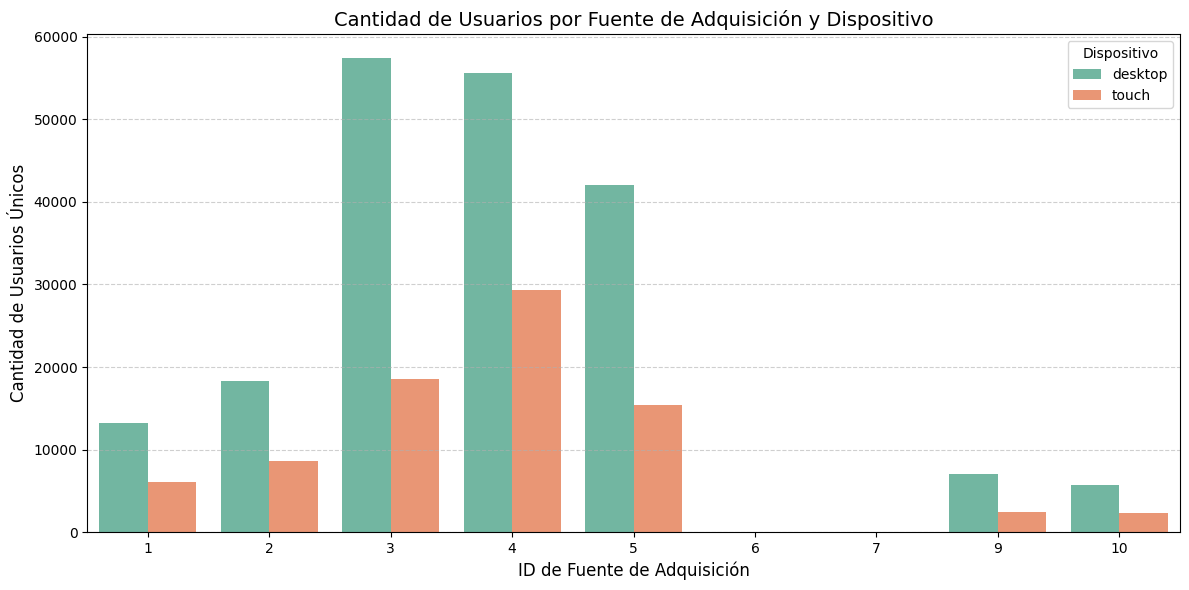

In [ ]:
# Agrupar por source_id y device, contando usuarios únicos
users_by_source_device = visits.groupby(['source_id', 'device'])['uid'].nunique().reset_index()

# Gráfico de barras agrupadas
plt.figure(figsize=(12, 6))
sns.barplot(data=users_by_source_device, x='source_id', y='uid', hue='device', palette='Set2')

# Títulos y etiquetas
plt.title('Cantidad de Usuarios por Fuente de Adquisición y Dispositivo', fontsize=14)
plt.xlabel('ID de Fuente de Adquisición', fontsize=12)
plt.ylabel('Cantidad de Usuarios Únicos', fontsize=12)
plt.legend(title='Dispositivo')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()

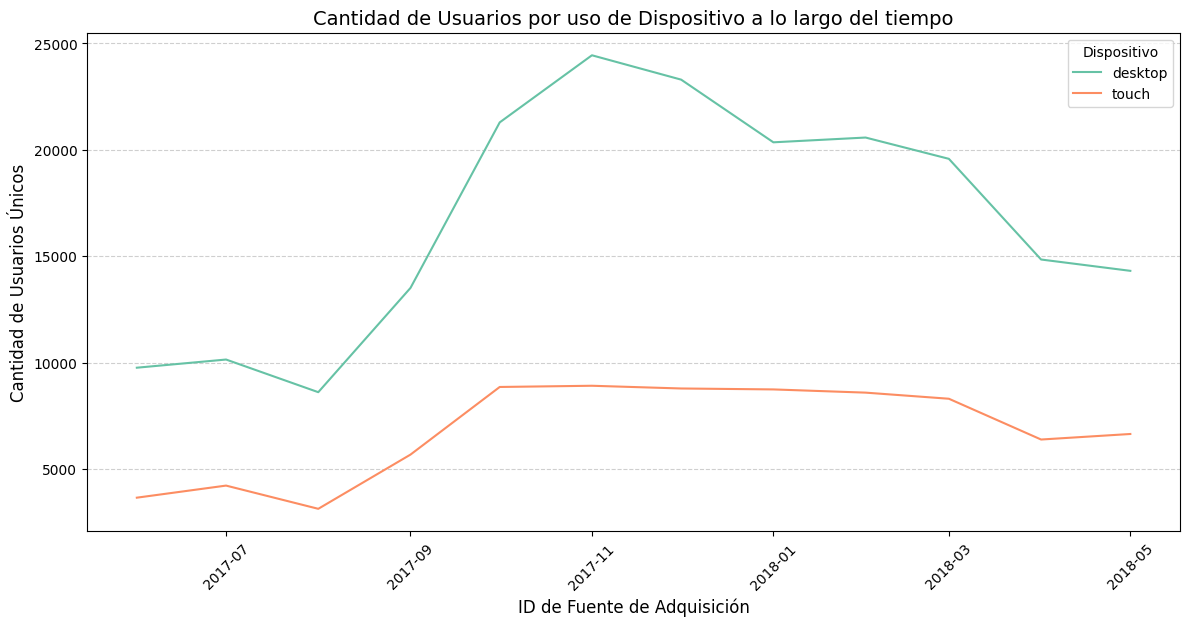

In [ ]:


# Agrupar por source_id y device, contando usuarios únicos
users_by_source_device = visits.groupby(['month', 'device'])['uid'].nunique().reset_index()

# Gráfico de barras agrupadas
plt.figure(figsize=(12, 6))
sns.lineplot(data=users_by_source_device, x='month', y='uid', hue='device', palette='Set2')

# Títulos y etiquetas
plt.title('Cantidad de Usuarios por uso de Dispositivo a lo largo del tiempo', fontsize=14)
plt.xlabel('ID de Fuente de Adquisición', fontsize=12)
plt.ylabel('Cantidad de Usuarios Únicos', fontsize=12)
plt.legend(title='Dispositivo')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.xticks(rotation=45)


plt.show()


## Análisis de Marketing y Comportamiento por Cohortes

A partir del análisis de los gastos en marketing y los beneficios generados por cada cohorte, se puede concluir que e``l modelo de negocio es rentable``, a pesar de una ligera desaceleración observada en 2018. El dispositivo más utilizado por los usuarios fue el ``Desktop``, lo cual indica una clara preferencia por este medio de acceso. Esta tendencia se ve respaldada por los resultados de las fuentes de adquisición identificadas con los source_id 3, 4 y 5, que generaron el mayor retorno de inversión en marketing.

El comportamiento mensual de inversión muestra coherencia con los beneficios obtenidos, lo que sugiere que las estrategias implementadas fueron efectivas en la mayoría de los canales. Sin embargo, en los dispositivos de tipo ``Touch``, se observa un rendimiento inferior y más estable, sin una correspondencia directa entre el gasto realizado y los beneficios obtenidos. Esto indica que, si bien tienen una base de usuarios, su rentabilidad es limitada.

En términos de optimización de presupuesto, se recomienda reducir la inversión en dispositivos Touch y en fuentes de adquisición con menor impacto, específicamente aquellas con source_id 1, 2, 9 y 10. Esta medida permitiría concentrar los recursos en canales y dispositivos con mayor retorno, mejorando la eficiencia del gasto en marketing.

# Conclusión General del Proyecto Showz

El proyecto de análisis realizado para Showz —una plataforma de venta de entradas para eventos— tuvo como objetivo principal optimizar el gasto en marketing y evaluar la viabilidad y sostenibilidad del negocio. A lo largo del análisis se procesaron datos de visitas, conversiones, ingresos, dispositivos, cohortes de usuarios, y campañas publicitarias desde enero de 2017 hasta diciembre de 2018.

El estudio incluyó el cálculo y seguimiento de métricas clave como LTV (Customer Lifetime Value), CAC (Customer Acquisition Cost), ROMI (Return on Marketing Investment) y AOV (Average Order Value), así como el análisis del comportamiento por cohortes, dispositivos y fuentes de adquisición,se determinó que ``el negocio es viable y rentable``, ``aunque presenta áreas claras de mejora ``en términos de eficiencia de inversión.

Pese a un decrecimiento moderado en la actividad durante 2018, el negocio logró mantener una rentabilidad sólida en las ``cohortes iniciales``, especialmente aquellas con un enfoque estratégico en dispositivos de escritorio y fuentes de adquisición específicas. El análisis también reveló patrones de comportamiento del usuario que permitirán ``tomar decisiones más informadas para futuras campañas.``



## Principales Hallazgos del Análisis

``Ingresos promedio y comportamiento de compra:``
 - El AOV (tamaño promedio de compra) se mantuvo estable en la mayoría de las cohortes, con una leve tendencia al alza, especialmente en los primeros meses del ciclo de vida del usuario.

 - Las cohortes iniciales generaron mayores ingresos acumulados, lo que evidencia un buen impacto inicial de las campañas.

 - El ingreso acumulado por cohorte aumentó de forma progresiva, lo que demuestra que los usuarios tienen una vida útil suficientemente larga como para justificar el gasto de adquisición.

``Tiempo de conversión:``
 - La mayoría de los usuarios convierten (compran) dentro de su primer dia y primer mes, pero el valor acumulado por cliente continúa creciendo durante al menos 6 a 10 meses posteriores.

 - Esto implica que es más eficiente fidelizar a los usuarios existentes que depender exclusivamente de nuevas adquisiciones.

 - Las cohortes con mayor crecimiento de LTV a lo largo del tiempo también muestran una mejor retención.
 
``Customer Lifetime Value (LTV):``
 - El LTV promedio por cohorte muestra un crecimiento sostenido, alcanzando picos a partir del mes 6 de antigüedad, y en algunos casos superando en más de 120% el retorno de inversión (ROMI).

 - Esto demuestra que una vez adquiridos, los usuarios aportan valor significativo en el mediano plazo.

``ROMI (Return on Marketing Investment):``
 - El ROMI promedio por cohorte supera el 100% después de los primeros 5-6 meses, lo cual indica una buena eficiencia general de las campañas.

 - Sin embargo, hay disparidad entre fuentes: algunas presentan un ROI excelente y otras no logran recuperar la inversión inicial.

``Dispositivos y fuentes de adquisición:``
 - Los usuarios que accedieron mediante Desktop tuvieron mayor tasa de conversión, mayor AOV y mayor LTV.

 - Los dispositivos Touch presentaron un menor rendimiento, con baja conversión y escasa recuperación de inversión.

 - Las fuentes de adquisición con source_id 3, 4 y 5 fueron las más efectivas en términos de CAC y ROMI.

 - Las fuentes con source_id 1, 2, 9 y 10 generaron altos costos con retorno limitado.

## Recomendaciones y Puntos Clave de Optimización

``Priorizar inversión en fuentes de alta rentabilidad (source_id 3, 4, 5)`` y reconsiderar o reestructurar las campañas con fuentes de bajo impacto.

``Reducir inversión en dispositivos "touch"``, donde no hay correlación positiva entre inversión y retorno.

``Desarrollar estrategias de retención para extender el ciclo de vida`` del cliente más allá de los 6 meses, donde el LTV se vuelve altamente rentable.

``Implementar análisis predictivo de ROMI y LTV ``para ajustar campañas en tiempo real.

``Crear un dashboard dinámico`` para seguimiento continuo de métricas clave como CAC, AOV, LTV y conversiones por cohorte.

``Test A/B por dispositivo y fuente para validar`` cambios en campañas antes de escalar presupuesto.

# FIN